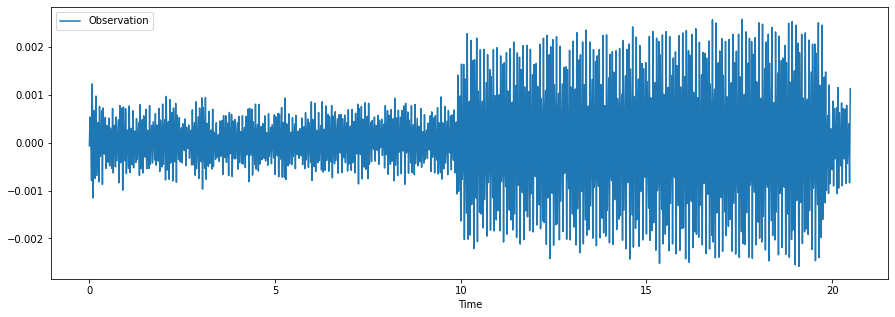

In [19]:
import sys; sys.path.append('.'); sys.path.append('..')

import lvm_read
import os
import pandas as pd

from benchmark.helpers import resample_time_series


dataset = lvm_read.read('../data/Ivol_Acc_Load_data3_w3_w2_50per_STD _NT.lvm')
resampled, sample_rate = resample_time_series(
    pd.DataFrame(dataset[0]['data'],
                 columns=[c.strip() for c in dataset[0]['Channel names'] if c])[['X_Value', 'Acceleration']],
    0.001
)

resampled.plot(y='Observation', x='Time', figsize=(15, 5))

In [2]:
from online_models import OnlineMLP

model = OnlineMLP(10, [10], 1, 5, 0, resampled.shape[0], verbose=True)

for _, _, obs in resampled.itertuples():
    model.update(obs)

Timestep: 1050/1050

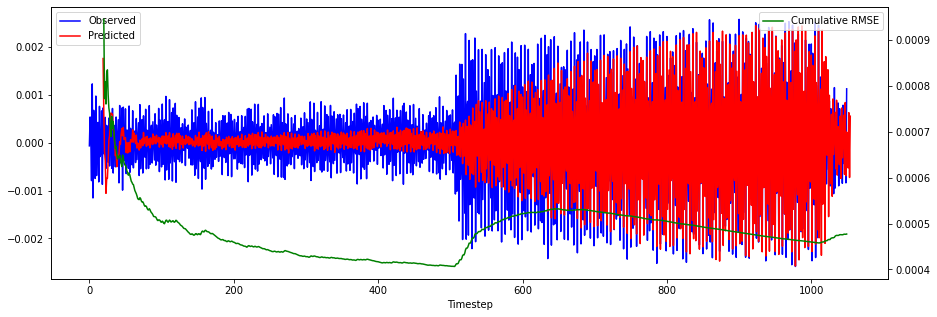

In [18]:
results = model.to_df()
ax = results.plot(y='Observed', x='Timestep', figsize=(15, 5), color='blue')
results.plot(y='Predicted', x='Timestep', ax=ax, color='red')
ax2 = ax.twinx()
results.plot(y='Cumulative RMSE', x='Timestep', ax=ax2, color='green')